<a href="https://colab.research.google.com/github/vmadalasa/EVAConsolidated/blob/master/EVAS13/Assignment%20A%20openCV/Madhu_OpenCV__Assignment_13_0630.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Memory Information

In [ ]:
import psutil
def get_size(bytes, suffix="B"):
    factor = 1024
    for unit in ["", "K", "M", "G", "T", "P"]:
        if bytes < factor:
            return f"{bytes:.2f}{unit}{suffix}"
        bytes /= factor
print("="*40, "Memory Information", "="*40)
svmem = psutil.virtual_memory()
print(f"Total: {get_size(svmem.total)}") ; print(f"Available: {get_size(svmem.available)}")
print(f"Used: {get_size(svmem.used)}") ; print(f"Percentage: {svmem.percent}%")

======================================== Memory Information ========================================
Total: 25.51GB
Available: 24.53GB
Used: 644.66MB
Percentage: 3.8%


In [ ]:
import cv2
import numpy as np

import sys
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
sys.path.append('/content/drive/My Drive/Assignment13/')
root_path = '/content/drive/My Drive/Assignment13/'

classes = []

#Load Yolov3

net = cv2.dnn.readNet (root_path + "yolov3.weights", root_path + "yolov3.cfg")

with open (root_path + "coco.names", "r") as file:
  classes = [line.strip() for line in file.readlines()]

layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

colors = np.random.uniform(0, 255, size=(len(classes), 3))


In [ ]:
img = cv2.imread(root_path + "IMG_1940.JPG")
img = cv2.resize(img, None, fx=1, fy=1)
height, width, channels = img.shape

In [ ]:
#Detecting Objects
blob_img = cv2.dnn.blobFromImage(img, 0.00392, size= (416, 416), mean = (0, 0, 0), swapRB=True, crop=False)
net.setInput (blob_img)
outs = net.forward(output_layers)

In [ ]:
threshold = 0.1
class_ids = []
confidences = []
boxes = []

for out in outs:
  for detection in out: 
    scores = detection[5:]
    class_id = np.argmax(scores)
    confidence = scores [class_id]
    if confidence > threshold:
      #Object Detected
      center_x = int (detection[0] * width)
      center_y = int (detection[1] * height)

      w = int (detection[2] * width)
      h = int (detection[3] * height)

      #Rectangle coordinates
      x = int (center_x - w/2)
      y = int (center_y - h/2)

      boxes.append([x, y, w, h])
      confidences.append (float(confidence))
      class_ids.append (class_id)

In [ ]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [ ]:
print (type(classes))
print ('Yes' if 'dog' in classes else 'No')

<class 'list'>
Yes


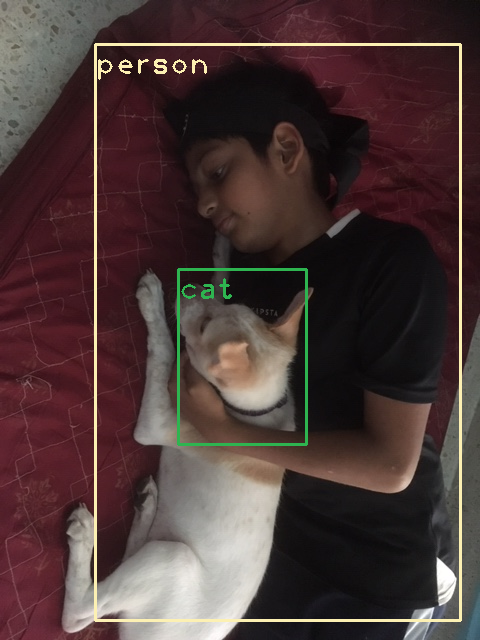

In [ ]:
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
  if i in indexes:
    x, y, w, h = boxes [i]
    label = str(classes[class_ids[i]])
    color = colors[i]
    cv2.rectangle (img, (x, y), (x + w, y + h), color, 2)
    cv2.putText(img, label, (x, y + 30), font, 2, color, 2)

cv2_imshow( img)
cv2.waitKey(0)
cv2.destroyAllWindows()